# The Code has to be run from the top!

In [318]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chisquare
from scipy.optimize import curve_fit
from scipy.stats import rayleigh, chi2
from scipy.optimize import minimize

In [319]:
# Set the random seed for reproducibility
np.random.seed(25)

## Likelihood in 1D

In [320]:
# Define the number of steps
n_steps = 1000

# Diffusion coefficient
D = 0.2  # You can change this value to any desired diffusion coefficient
t_step = 0.1  # Time between steps

# Simulate a single random walk with normally distributed step sizes
final_positions_random = np.random.normal(0, np.sqrt(2 * D * t_step), size=n_steps)

# Calculate the diffusion coefficient D using the MSD approach with random step sizes
D_MSD_random = sum(final_positions_random**2) / (2 * (n_steps - 1) * t_step)

# Calculate the standard diviation of the estimated diffusion coefficient
variance_D = (2 * D_MSD_random**2) / n_steps

error_D = np.sqrt(variance_D)


# Print the real and estimated diffusion coefficients with errors
print(f"Real Diffusion Coefficient D: {D}")
print(f"Estimated Diffusion Coefficient D_MSD_random: {D_MSD_random:.4f} +/- {error_D:.4f}")


Real Diffusion Coefficient D: 0.2
Estimated Diffusion Coefficient D_MSD_random: 0.2162 +/- 0.0097


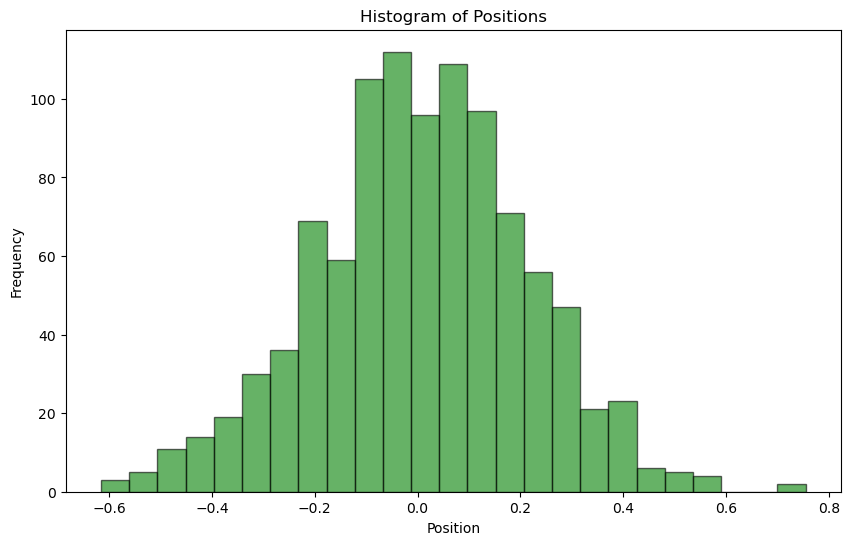

In [321]:
# Plot the distribution of the final positions
plt.figure(figsize=(10, 6))
plt.hist(final_positions_random, bins=25, alpha=0.6, color='g', edgecolor='black')

# Add labels and title
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title(f'Histogram of Positions')

plt.show()

Estimated mu: 0.0072 +/- 0.0066
Estimated sigma: 0.2077 +/- 0.0046
mu: 0.01, sigma: 0.21
Chi2: 37.38
NDF: 22
p-value: 0.02


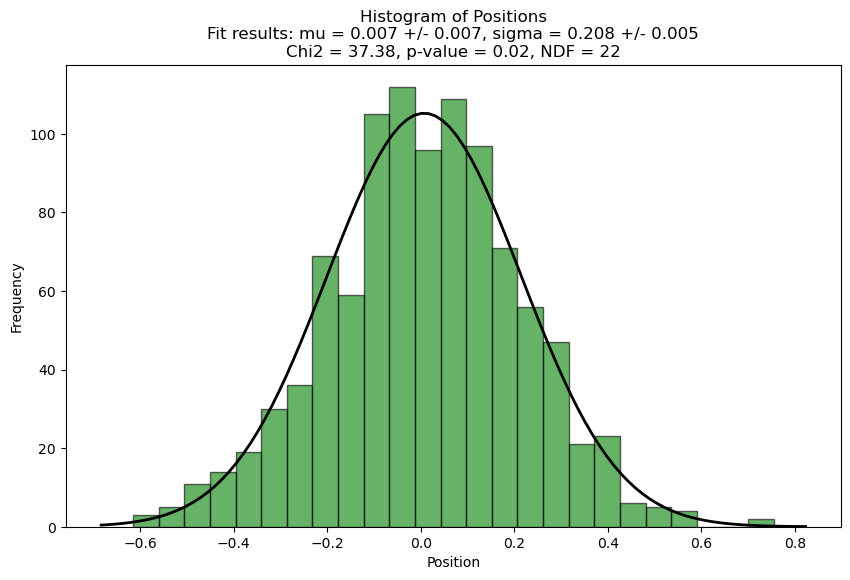

In [322]:
# Calculate the standard error for mu and sigma
mu = np.mean(final_positions_random)
sigma = np.std(final_positions_random)

# Standard diviation for mu
error_mu = sigma / np.sqrt(n_steps)

# Standard error for sigma
error_sigma = sigma / np.sqrt(2 * n_steps)

# Print the estimated mu and sigma with their errors
print(f"Estimated mu: {mu:.4f} +/- {error_mu:.4f}")
print(f"Estimated sigma: {sigma:.4f} +/- {error_sigma:.4f}")

# Plot the distribution of the final positions
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(final_positions_random, bins=25, alpha=0.6, color='g', edgecolor='black')  # Frequency histogram

# Calculate the expected counts for each bin using the Gaussian formula
bin_centers = 0.5 * (bins[1:] + bins[:-1])
bin_width = bins[1] - bins[0]
expected_counts = (1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((bin_centers - mu) / sigma)**2)) * bin_width * n_steps

# Calculate the chi-square statistic
observed_counts = counts
chi2_dis = np.sum((observed_counts - expected_counts)**2 / expected_counts)

# Number of degrees of freedom
NDF = len(counts) - 2 - 1  # Bins - parameters (mu and sigma) - 1

# Calculate the p-value
p_value = 1 - chi2.cdf(chi2_dis, NDF)

# Print intermediate results for debugging
print(f"mu: {mu:.2f}, sigma: {sigma:.2f}")
print(f"Chi2: {chi2_dis:.2f}")
print(f"NDF: {NDF}")
print(f"p-value: {p_value:.2f}")

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2) * bin_width * n_steps
plt.plot(x, p, 'k', linewidth=2)

# Add labels, title, and chi-square test results
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title(f'Histogram of Positions\nFit results: mu = {mu:.3f} +/- {error_mu:.3f}, sigma = {sigma:.3f} +/- {error_sigma:.3f}\n'
          f'Chi2 = {chi2_dis:.2f}, p-value = {p_value:.2f}, NDF = {NDF}')

plt.show()

## Likelihood in 2d

In [323]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_2D_random_walk(diffusion_coeff, noise_level, steps=1000, time_step=0.1):
    positions = np.sqrt(2 * diffusion_coeff * time_step) * np.random.randn(2, steps)
    noise = noise_level * np.random.randn(2, steps)
    return positions, positions + noise

# Parameters for the simulation
diffusion_coeff = 0.2
noise_level = 0
steps = 1000
time_step = 0.1

# Simulate the 2D random walk
positions, noisy_positions = simulate_2D_random_walk(diffusion_coeff, noise_level, steps, time_step)

# Calculate step lengths
r = np.sqrt(noisy_positions[0]**2 + noisy_positions[1]**2)

# estimated diffusion coefficient
dis = sum(r**2)

D = dis / (4 * steps * time_step)

# Calculate the standard deviation of the estimated diffusion coefficient
variance_D = (2 * D**2) / steps
error_D = np.sqrt(variance_D)

D_real = D - noise_level**2/(2 * time_step)

variance_D_real = variance_D + (noise_level**4 / (4 * time_step**2)) / steps    # Variance of the real diffusion coefficient

error_D_real = np.sqrt(variance_D_real) # Standard deviation of the real diffusion coefficient

print(f"Estimated Diffusion Coefficient D: {D:.4f} +/- {error_D:.4f}")
print(f"Real Diffusion Coefficient D: {D_real:.4f} +/- {error_D_real:.4f}")

Estimated Diffusion Coefficient D: 0.1955 +/- 0.0087
Real Diffusion Coefficient D: 0.1955 +/- 0.0087


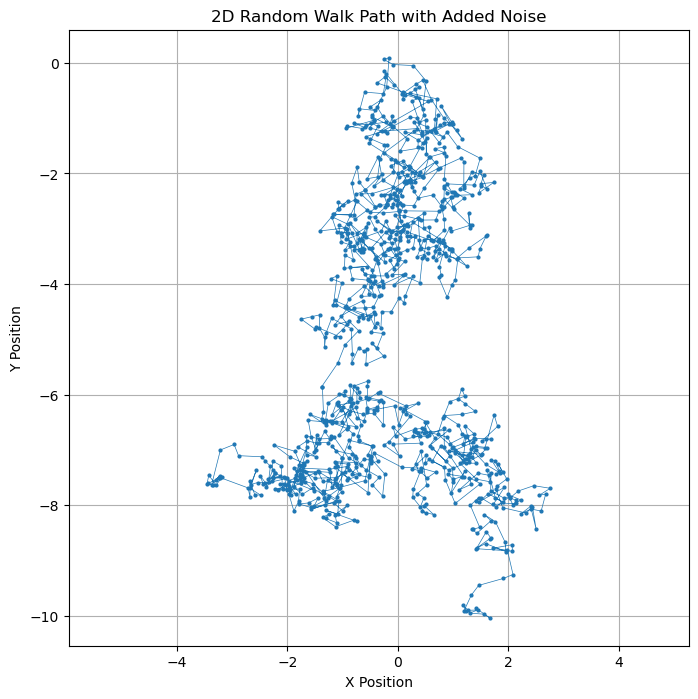

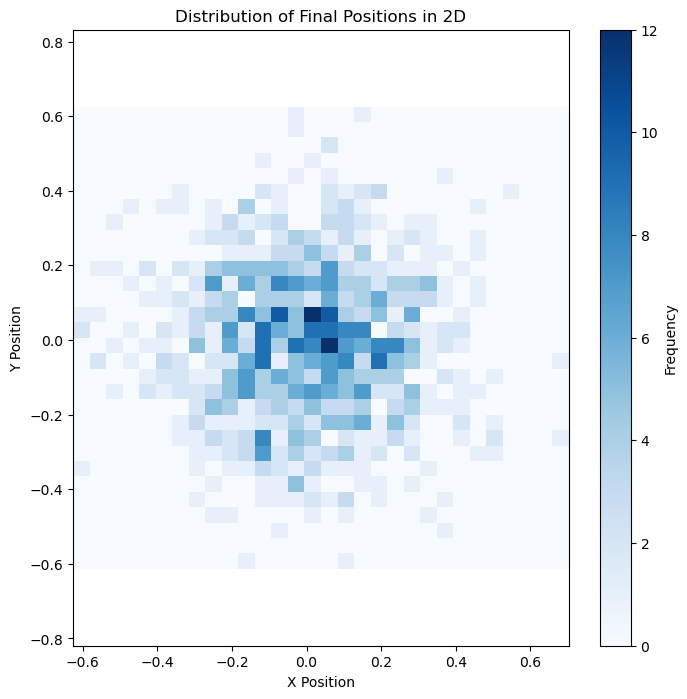

In [324]:
# Plot the 2D random walk path
plt.figure(figsize=(8, 8))
plt.plot(np.cumsum(noisy_positions[0]), np.cumsum(noisy_positions[1]), marker='o', linestyle='-', markersize=2, linewidth=0.5)
plt.title('2D Random Walk Path with Added Noise')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.axis('equal')  # Ensuring equal scaling for both axes
plt.show()

# Plotting the distribution of final positions as a 2D histogram
plt.figure(figsize=(8, 8))
plt.hist2d(noisy_positions[0], noisy_positions[1], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Distribution of Final Positions in 2D')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')  # Ensure equal scaling for x and y axes
plt.show()

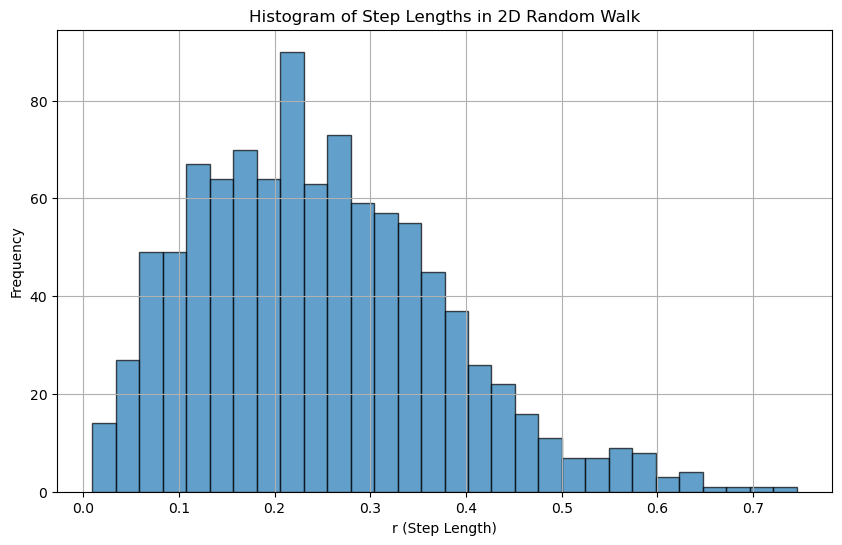

In [325]:
# Plot the histogram of step lengths
plt.figure(figsize=(10, 6))
plt.hist(r, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Step Lengths in 2D Random Walk')
plt.xlabel('r (Step Length)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Rayleigh fit method

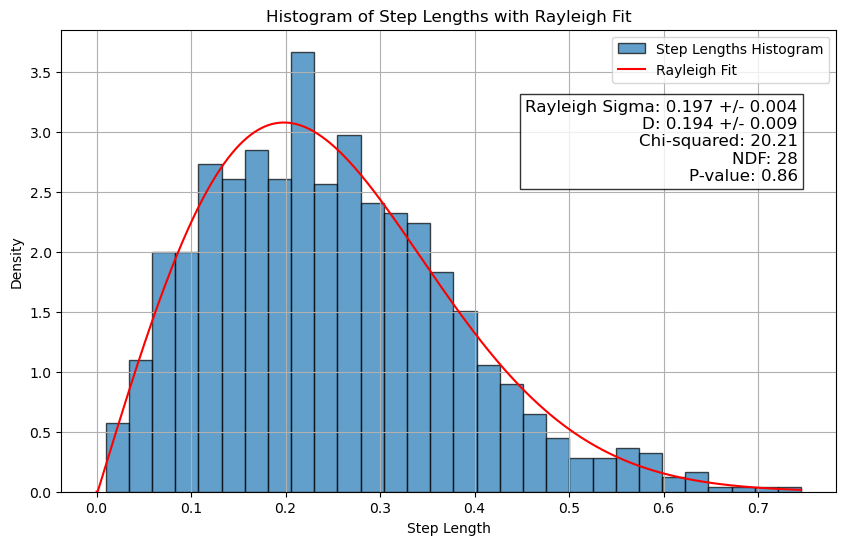

Estimated Rayleigh Sigma: 0.1971 +/- 0.0044
Estimated Diffusion Coefficient D from Rayleigh Sigma: 0.1942 +/- 0.0087
Real Diffusion Coefficient D from Rayleigh Sigma: 0.1942 +/- 0.0087


In [326]:

# Fit a Rayleigh distribution to the step lengths
params = rayleigh.fit(r)
sigma = params[1]  # The scale parameter is sigma

# Calculate the error for the Rayleigh sigma
# The standard error of the sigma parameter for a Rayleigh distribution can be approximated
n = len(r)
sigma_error = sigma / np.sqrt(2 * n)

# Calculate the diffusion coefficient D using the relationship
# sigma^2 = 2 * D * time_step
D_estimated = sigma**2 / (2 * time_step)

# Calculate the error for the estimated diffusion coefficient D from the Rayleigh sigma
error_D_estimated = 2 * sigma * sigma_error / (2 * time_step)


# Perform chi-squared goodness of fit test manually
observed, bin_edges = np.histogram(r, bins=30, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
expected = rayleigh.pdf(bin_centers, loc=params[0], scale=params[1])

# Convert density to frequency by multiplying by the total number of observations and bin width
observed_freq = observed * np.diff(bin_edges) * len(r)
expected_freq = expected * np.diff(bin_edges) * len(r)

# Calculate chi-squared statistic
chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)

# Calculate number of degrees of freedom (NDF)
NDF = len(observed) - 1 - 1  # number of bins - 1 - number of estimated parameters

# Calculate p-value
p_value = 1 - chi2.cdf(chi2_stat, NDF)

# Plot the histogram with the Rayleigh fit
x = np.linspace(0, r.max(), 1000)
pdf_fitted = rayleigh.pdf(x, loc=params[0], scale=params[1])

plt.figure(figsize=(10, 6))
plt.hist(r, bins=30, density=True, edgecolor='k', alpha=0.7, label='Step Lengths Histogram')
plt.plot(x, pdf_fitted, 'r-', label='Rayleigh Fit')
plt.title('Histogram of Step Lengths with Rayleigh Fit')
plt.xlabel('Step Length')
plt.ylabel('Density')

# Include Chi2, p-value, and NDF in the plot
plt.text(0.95, 0.85, f'Rayleigh Sigma: {sigma:.3f} +/- {sigma_error:.3f}\nD: {D_estimated:.3f} +/- {error_D_estimated:.3f}\nChi-squared: {chi2_stat:.2f}\nNDF: {NDF}\nP-value: {p_value:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))

plt.legend()
plt.grid(True)
plt.show()

D_real = D_estimated - noise_level**2/(2 * time_step)
variance_D_real = 2 * D_real**2 / n
error_D_real = np.sqrt(variance_D_real)

print(f"Estimated Rayleigh Sigma: {sigma:.4f} +/- {sigma_error:.4f}")
print(f"Estimated Diffusion Coefficient D from Rayleigh Sigma: {D_estimated:.4f} +/- {error_D_estimated:.4f}")
print(f"Real Diffusion Coefficient D from Rayleigh Sigma: {D_real:.4f} +/- {error_D_real:.4f}")

## Two state diffusion

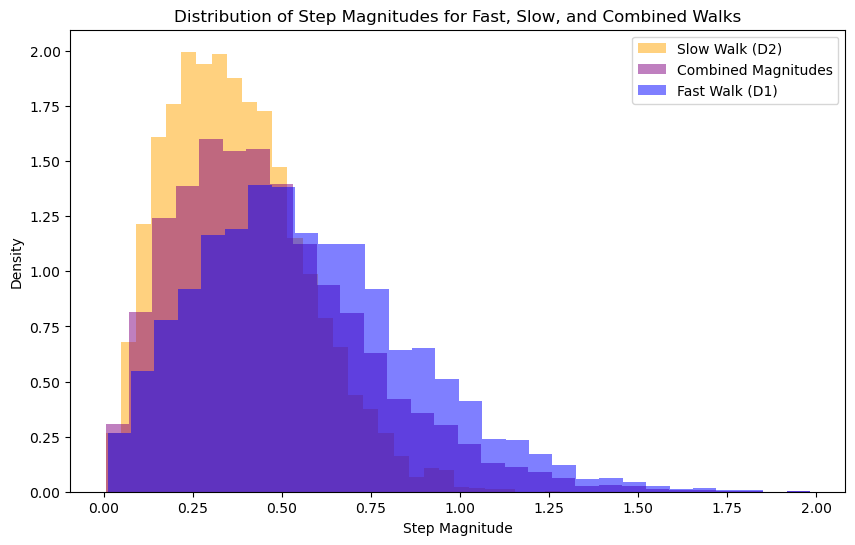

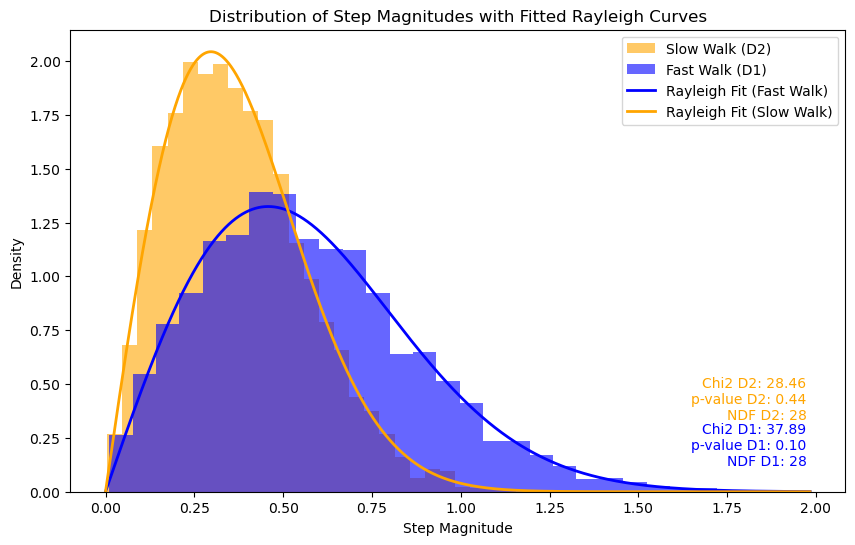

Estimated D1: 1.0488 +/- 0.0465
Estimated D2: 0.4407 +/- 0.0923
Estimated D1 minus noise: 0.9988 +/- 0.0148
Estimated D2 minus noise: 0.3907 +/- 0.0062
Optimized weight f: 0.490


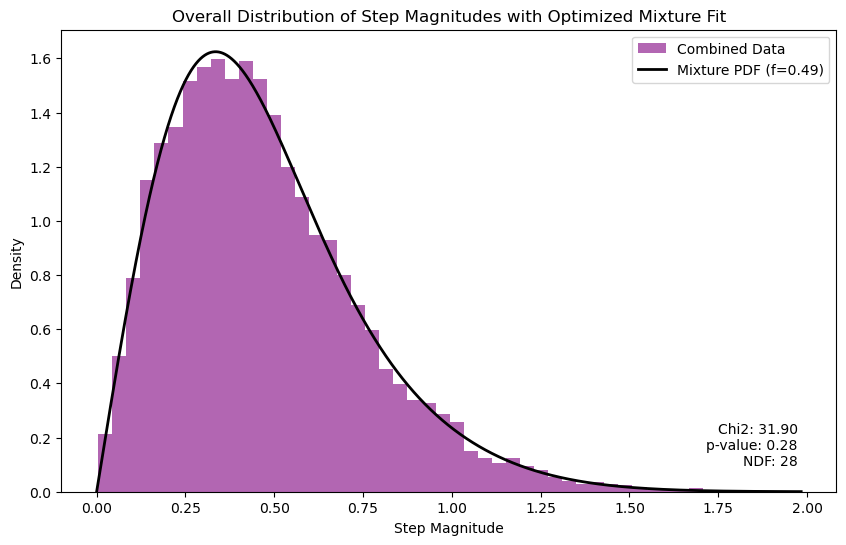

In [327]:
import numpy as np
import matplotlib.pyplot as plt


def simulate_and_collect_steps_with_noise(D1, D2, prob_D1_to_D2, prob_D2_to_D1, sigma, steps=10000, time_step=0.1):
    positions = np.zeros((2, steps))
    step_magnitudes_D1 = []
    step_magnitudes_D2 = []
    combined_magnitudes = []

    current_D = D1
    in_D1 = True

    for i in range(1, steps):
        step_size = np.sqrt(2 * current_D * time_step + sigma ** 2) * np.random.randn(2)
        step_magnitude = np.linalg.norm(step_size)
        positions[:, i] = positions[:, i - 1] + step_size

        if in_D1: # Collect step magnitudes for D1 and D2 separately
            step_magnitudes_D1.append(step_magnitude)
        else:
            step_magnitudes_D2.append(step_magnitude)

        combined_magnitudes.append(step_magnitude)

        if in_D1 and np.random.rand() < prob_D1_to_D2: # Switch from D1 to D2
            current_D = D2
            in_D1 = False
        elif not in_D1 and np.random.rand() < prob_D2_to_D1:
            current_D = D1
            in_D1 = True

    return step_magnitudes_D1, step_magnitudes_D2, combined_magnitudes

# Simulation parameters
D1 = 1.0
D2 = 0.4
prob_D1_to_D2 = 0.005
prob_D2_to_D1 = 0.005
steps = 10000
time_step = 0.1
sigma = 0.1

step_magnitudes_D1, step_magnitudes_D2, combined_magnitudes = simulate_and_collect_steps_with_noise(D1, D2, prob_D1_to_D2, prob_D2_to_D1, sigma, steps, time_step)

plt.figure(figsize=(10, 6))
plt.hist(step_magnitudes_D2, bins=30, alpha=0.5, color='orange', label='Slow Walk (D2)', density=True)
plt.hist(combined_magnitudes, bins=30, alpha=0.5, color='purple', label='Combined Magnitudes', density=True)
plt.hist(step_magnitudes_D1, bins=30, alpha=0.5, color='blue', label='Fast Walk (D1)', density=True)
plt.xlabel('Step Magnitude')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Step Magnitudes for Fast, Slow, and Combined Walks')
plt.show()

# Fit Rayleigh distributions to the step magnitudes for D1 and D2
param_D1 = rayleigh.fit(step_magnitudes_D1, floc=0)
param_D2 = rayleigh.fit(step_magnitudes_D2, floc=0)

sigma_D1 = param_D1[1]
sigma_D2 = param_D2[1]

# Calculate the estimated diffusion coefficients for D1 and D2
estimated_D1 = (sigma_D1 ** 2) / (2 * time_step)
estimated_D2 = (sigma_D2 ** 2) / (2 * time_step)

error_D1 = abs(D1 - estimated_D1) / abs(estimated_D1)
error_D2 = abs(D2 - estimated_D2) / abs(estimated_D2)

# Calculate the estimated diffusion coefficients for D1 and D2 without noise
estimated_no_noise_D1 = estimated_D1 - (sigma ** 2) / (2 * time_step)
estimated_no_noise_D2 = estimated_D2 - (sigma ** 2) / (2 * time_step)

variance_D1 = 2 * estimated_D1 ** 2 / steps
variance_D2 = 2 * estimated_D2 ** 2 / steps

eror_no_noise_D1 = np.sqrt(variance_D1)
eror_no_noise_D2 = np.sqrt(variance_D2)

# Perform chi-squared goodness of fit tests for D1 and D2
observed_D1, bin_edges_D1 = np.histogram(step_magnitudes_D1, bins=30, density=True)
bin_centers_D1 = 0.5 * (bin_edges_D1[1:] + bin_edges_D1[:-1])
expected_D1 = rayleigh.pdf(bin_centers_D1, loc=param_D1[0], scale=param_D1[1])

observed_D2, bin_edges_D2 = np.histogram(step_magnitudes_D2, bins=30, density=True)
bin_centers_D2 = 0.5 * (bin_edges_D2[1:] + bin_edges_D2[:-1])
expected_D2 = rayleigh.pdf(bin_centers_D2, loc=param_D2[0], scale=param_D2[1])

observed_freq_D1 = observed_D1 * np.diff(bin_edges_D1) * len(step_magnitudes_D1)
expected_freq_D1 = expected_D1 * np.diff(bin_edges_D1) * len(step_magnitudes_D1)

observed_freq_D2 = observed_D2 * np.diff(bin_edges_D2) * len(step_magnitudes_D2)
expected_freq_D2 = expected_D2 * np.diff(bin_edges_D2) * len(step_magnitudes_D2)

chi2_stat_D1 = np.sum((observed_freq_D1 - expected_freq_D1)**2 / expected_freq_D1)
chi2_stat_D2 = np.sum((observed_freq_D2 - expected_freq_D2)**2 / expected_freq_D2)

NDF_D1 = len(observed_D1) - 1 - 1
NDF_D2 = len(observed_D2) - 1 - 1

p_value_D1 = 1 - chi2.cdf(chi2_stat_D1, NDF_D1)
p_value_D2 = 1 - chi2.cdf(chi2_stat_D2, NDF_D2)

# Plot the histograms with the Rayleigh fits
plt.figure(figsize=(10, 6))
plt.hist(step_magnitudes_D2, bins=30, alpha=0.6, color='orange', label='Slow Walk (D2)', density=True)
plt.hist(step_magnitudes_D1, bins=30, alpha=0.6, color='blue', label='Fast Walk (D1)', density=True)

x = np.linspace(0, max(step_magnitudes_D1 + step_magnitudes_D2), 10000)
plt.plot(x, rayleigh.pdf(x, *param_D1), 'b-', lw=2, label='Rayleigh Fit (Fast Walk)')
plt.plot(x, rayleigh.pdf(x, *param_D2), 'orange', lw=2, label='Rayleigh Fit (Slow Walk)')

plt.xlabel('Step Magnitude')
plt.ylabel('Density')

plt.text(0.95, 0.05, f'Chi2 D1: {chi2_stat_D1:.2f}\np-value D1: {p_value_D1:.2f}\nNDF D1: {NDF_D1}', 
         transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right', color='blue', fontsize=10)
plt.text(0.95, 0.15, f'Chi2 D2: {chi2_stat_D2:.2f}\np-value D2: {p_value_D2:.2f}\nNDF D2: {NDF_D2}', 
         transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right', color='orange', fontsize=10)

plt.legend()
plt.title('Distribution of Step Magnitudes with Fitted Rayleigh Curves')
plt.show()

print(f"Estimated D1: {estimated_D1:.4f} +/- {error_D1:.4f}")
print(f"Estimated D2: {estimated_D2:.4f} +/- {error_D2:.4f}")
print(f"Estimated D1 minus noise: {estimated_no_noise_D1:.4f} +/- {eror_no_noise_D1:.4f}")
print(f"Estimated D2 minus noise: {estimated_no_noise_D2:.4f} +/- {eror_no_noise_D2:.4f}")

# Fit a mixture of two Rayleigh distributions to the combined step magnitudes
def mixture_pdf(x, f, param_D1, param_D2):
    r1_pdf = rayleigh.pdf(x, *param_D1)
    r2_pdf = rayleigh.pdf(x, *param_D2)
    return f * r1_pdf + (1 - f) * r2_pdf

def negative_log_likelihood(params, data, param_D1, param_D2):
    f = params[0]
    pdf_values = mixture_pdf(data, f, param_D1, param_D2)
    return -np.sum(np.log(pdf_values + 1e-8))

# Optimize the weight f for the mixture distribution
initial_guess = [0.5]
bounds = [(0, 1)]
result = minimize(
    negative_log_likelihood,
    initial_guess,
    args=(combined_magnitudes, param_D1, param_D2),
    bounds=bounds
)

f_opt = result.x[0]
print(f"Optimized weight f: {f_opt:.3f}")

x_range = np.linspace(0, max(combined_magnitudes), 10000)
pdf_combined = mixture_pdf(x_range, f_opt, param_D1, param_D2)

# Chi-squared goodness of fit for combined distribution
observed_combined, bin_edges_combined = np.histogram(combined_magnitudes, bins=30, density=True)
bin_centers_combined = 0.5 * (bin_edges_combined[1:] + bin_edges_combined[:-1])
expected_combined = mixture_pdf(bin_centers_combined, f_opt, param_D1, param_D2)

observed_freq_combined = observed_combined * np.diff(bin_edges_combined) * len(combined_magnitudes)
expected_freq_combined = expected_combined * np.diff(bin_edges_combined) * len(combined_magnitudes)

chi2_stat_combined = np.sum((observed_freq_combined - expected_freq_combined)**2 / expected_freq_combined)
NDF_combined = len(observed_combined) - 1 - 1  # number of bins - 1 - number of estimated parameters
p_value_combined = 1 - chi2.cdf(chi2_stat_combined, NDF_combined)

# Plot the histogram with the optimized mixture fit
plt.figure(figsize=(10, 6))
plt.hist(combined_magnitudes, bins=50, alpha=0.6, color='purple', label='Combined Data', density=True)
plt.plot(x_range, pdf_combined, 'k-', lw=2, label=f'Mixture PDF (f={f_opt:.2f})')

plt.xlabel('Step Magnitude')
plt.ylabel('Density')
plt.legend()
plt.title('Overall Distribution of Step Magnitudes with Optimized Mixture Fit')

plt.text(0.95, 0.05, f'Chi2: {chi2_stat_combined:.2f}\np-value: {p_value_combined:.2f}\nNDF: {NDF_combined}', 
         transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10)

plt.show()

sigma_combined = np.sqrt(f_opt * (sigma_D1 ** 2) + (1 - f_opt) * (sigma_D2 ** 2))


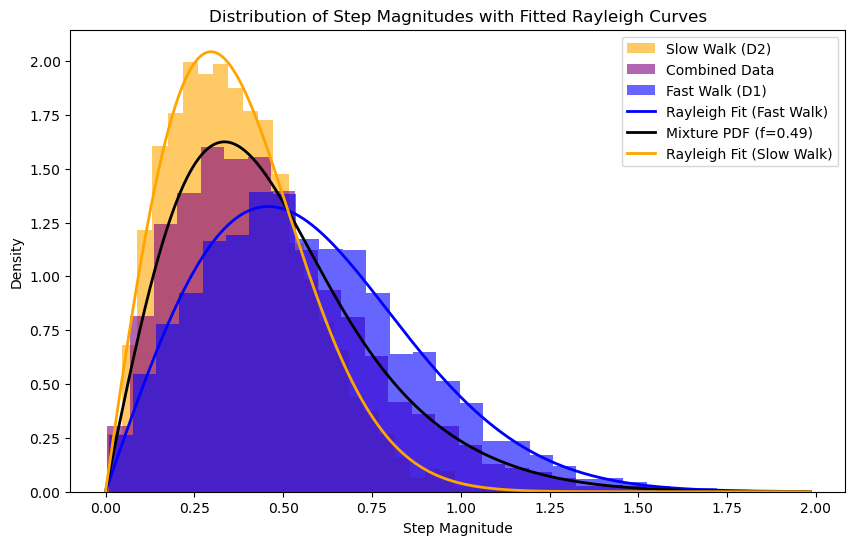

In [328]:
plt.figure(figsize=(10, 6))
plt.hist(step_magnitudes_D2, bins=30, alpha=0.6, color='orange', label='Slow Walk (D2)', density=True)
plt.hist(combined_magnitudes, bins=30, alpha=0.6, color='purple', label='Combined Data', density=True)
plt.hist(step_magnitudes_D1, bins=30, alpha=0.6, color='blue', label='Fast Walk (D1)', density=True)

x = np.linspace(0, max(step_magnitudes_D1 + step_magnitudes_D2), 10000)
plt.plot(x, rayleigh.pdf(x, *param_D1), 'b-', lw=2, label='Rayleigh Fit (Fast Walk)')
plt.plot(x_range, pdf_combined, 'k-', lw=2, label=f'Mixture PDF (f={f_opt:.2f})')
plt.plot(x, rayleigh.pdf(x, *param_D2), 'orange', lw=2, label='Rayleigh Fit (Slow Walk)')

plt.xlabel('Step Magnitude')
plt.ylabel('Density')

plt.legend()
plt.title('Distribution of Step Magnitudes with Fitted Rayleigh Curves')
plt.show()

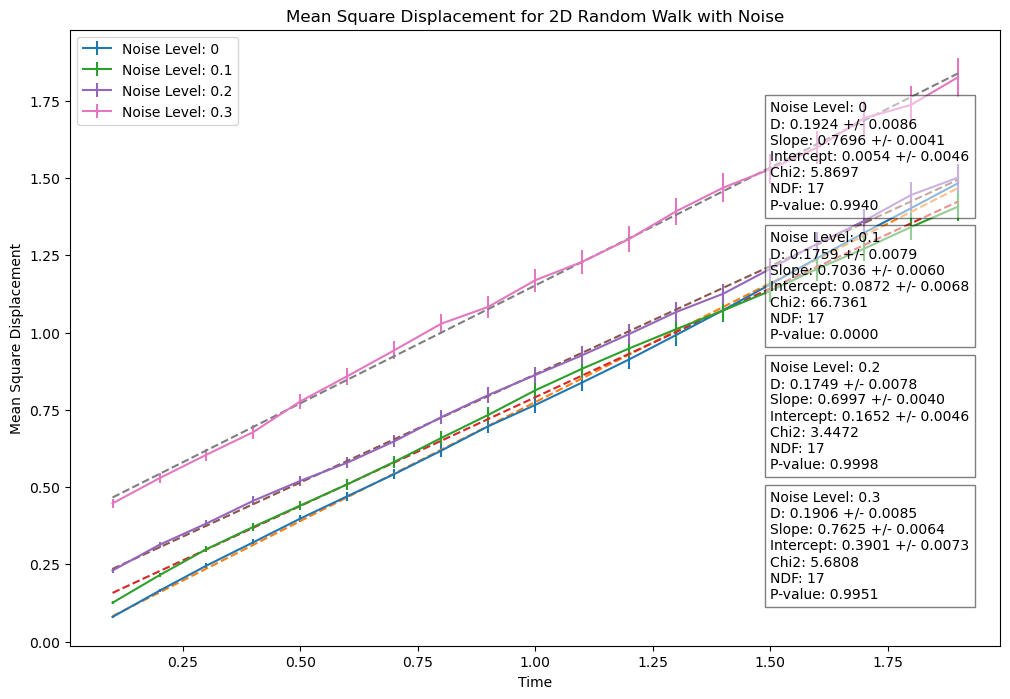

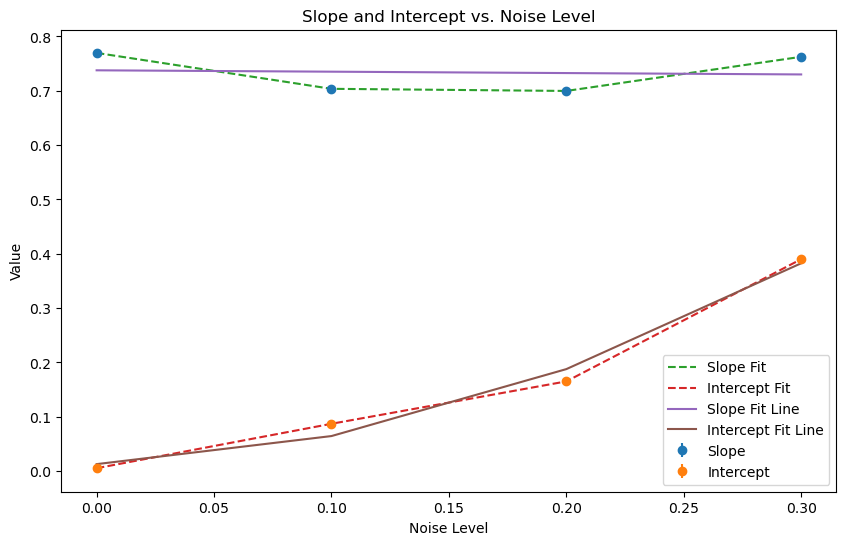

Mean Diffusion Coefficient from mean slope: 0.1835 +/- 0.0013
Estimated Noise Level: 0.0367 +/- 0.0016
Estimated Noise Level: 0.1476 +/- 0.0066
Estimated Noise Level: 0.2032 +/- 0.0091
Estimated Noise Level: 0.3123 +/- 0.0140


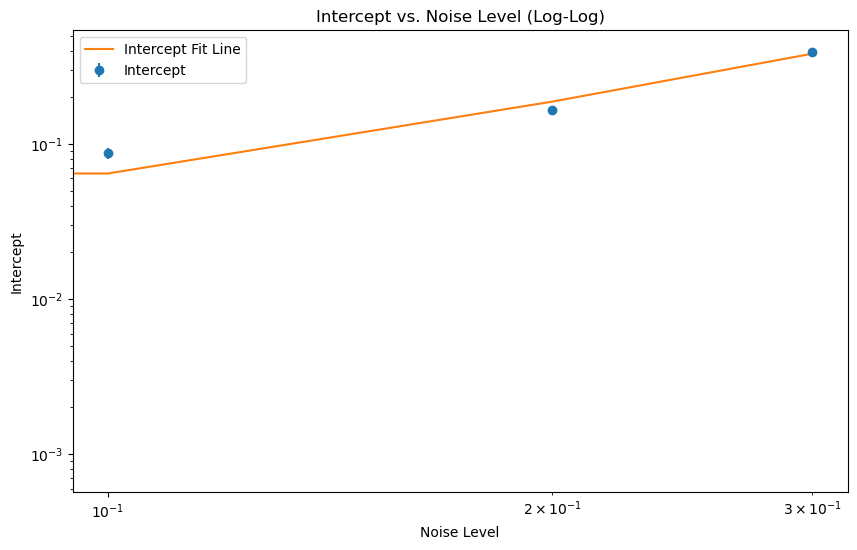

In [329]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Function to simulate 2D random walk with noise
def simulate_2D_random_walk(diffusion_coeff, noise_level, steps, time_step):
    positions = np.cumsum(np.sqrt(2 * diffusion_coeff * time_step) * np.random.randn(2, steps), axis=1)
    noise = noise_level * np.random.randn(2, steps)
    return positions, positions + noise

# Function to calculate mean square displacement
def calculate_mean_square_displacement(positions, max_interval=19):
    msd = np.zeros(max_interval)
    msd_errors = np.zeros(max_interval)
    for i in range(1, max_interval + 1):
        displacement = np.sum((positions[:, :-i] - positions[:, i:]) ** 2, axis=0)
        msd[i-1] = np.mean(displacement)
        msd_errors[i-1] = np.std(displacement) / np.sqrt(displacement.size)
    return msd, msd_errors

# Linear function for fitting
def linear_function(t, a, b):
    return a * t + b


# Function to calculate chi-squared
def calculate_chi_squared(observed, expected, errors):
    return np.sum(((observed - expected) / errors) ** 2)

# Main code for plotting
noise_values = [0, 0.1, 0.2, 0.3]
diffusion_coeff = 0.2
time_intervals = np.arange(1, 20) * 0.1  # Matches max_interval in calculate_mean_square_displacement

#finding values for different noise levels and saving them in a list
noisy_positions = []
msd_values = []
msd_errors_values = []

for noise in noise_values:
    positions, noisy_positions = simulate_2D_random_walk(diffusion_coeff, noise, steps=1000, time_step=0.1)
    msd, msd_errors = calculate_mean_square_displacement(noisy_positions)
    msd_values.append(msd)
    msd_errors_values.append(msd_errors)


plt.figure(figsize=(12, 8))
y_position = 1.4  # Starting position for annotations

slopes = []
intercepts = []
errors = []
intercept_errors = []

for noise in noise_values: 
    msd = msd_values[noise_values.index(noise)]
    msd_errors = msd_errors_values[noise_values.index(noise)]

    plt.errorbar(time_intervals, msd, yerr=msd_errors, label=f'Noise Level: {noise}')
    
    # Fit a linear function to the MSD data (ax + b)
    popt, pcov = curve_fit(linear_function, time_intervals, msd)
    slope, intercept = popt
    D_estimate = slope / 4
    variance_D = 2 * D_estimate**2 / 1000
    D_error = np.sqrt(variance_D)
    error_slope = np.sqrt(pcov[0, 0])
    error_in = np.sqrt(pcov[1, 1])
    slopes.append(slope)
    intercepts.append(intercept)
    errors.append(error_slope)
    intercept_errors.append(error_in)

    plt.plot(time_intervals, linear_function(time_intervals, *popt), '--')

    # Calculate chi-squared
    fitted_msd = linear_function(time_intervals, *popt)
    chi2_stat = calculate_chi_squared(msd, fitted_msd, msd_errors)
    ndf = len(msd) - 2  # Number of degrees of freedom (2 parameters: slope and intercept)
    p_value = 1 - chi2.cdf(chi2_stat, ndf)

    # Annotate the plot with slope, intercept, diffusion coefficient, and chi-squared
    annotation = (
        f'Noise Level: {noise}\n'
        f'D: {D_estimate:.4f} +/- {D_error:.4f}\n'
        f'Slope: {slope:.4f} +/- {error_slope:.4f}\n'
        f'Intercept: {intercept:.4f} +/- {error_in:.4f}\n'
        f'Chi2: {chi2_stat:.4f}\n'
        f'NDF: {ndf}\n'
        f'P-value: {p_value:.4f}'
    )
    plt.text(1.5, y_position, annotation, bbox=dict(facecolor='white', alpha=0.5))
    y_position -= 0.42 # Decrease y position for the next annotation

plt.title('Mean Square Displacement for 2D Random Walk with Noise')
plt.xlabel('Time')
plt.ylabel('Mean Square Displacement')
plt.legend()
plt.show()



 # plot the slopes and intercepts
plt.figure(figsize=(10, 6))
plt.errorbar(noise_values, slopes, yerr=errors, fmt='o', label='Slope')
plt.errorbar(noise_values, intercepts, yerr=intercept_errors, fmt='o', label='Intercept')
plt.plot(noise_values, slopes, '--', label='Slope Fit')
plt.plot(noise_values, intercepts, '--', label='Intercept Fit')

# fitting a line to the slope
slope_fit = np.polyfit(noise_values, slopes, 1)
slope_fit_line = np.polyval(slope_fit, noise_values)

#fitting a second order polynomial to the intercept
intercept_fit = np.polyfit(noise_values, intercepts, 2)
intercept_fit_line = np.polyval(intercept_fit, noise_values)

plt.plot(noise_values, slope_fit_line, label='Slope Fit Line')
plt.plot(noise_values, intercept_fit_line, label='Intercept Fit Line')
plt.xlabel('Noise Level')
plt.ylabel('Value')
plt.title('Slope and Intercept vs. Noise Level')
plt.legend()
plt.show()

# priny the estimated diffusion coefficient and the diffusion coefficient for the mean slope
mean_slope = np.mean(slopes)
mean_intercept = np.mean(intercepts)
mean_D = mean_slope / 4
mean_D_error = np.sqrt(np.mean(errors)**2) / 4
print(f'Mean Diffusion Coefficient from mean slope: {mean_D:.4f} +/- {mean_D_error:.4f}')

# estimate the noise from the intercept
for intercept in intercepts:
    noise_estimate = np.sqrt(intercept) / 2
    variance_noise = 2 * noise_estimate**2 / 1000
    error_noise = np.sqrt(variance_noise)
    print(f'Estimated Noise Level: {noise_estimate:.4f} +/- {error_noise:.4f}')

#plotting the intercepts with log on x and y axis and a 2 degree polinomial fit
plt.figure(figsize=(10, 6))
plt.errorbar(noise_values, intercepts, yerr=intercept_errors, fmt='o', label='Intercept')
plt.yscale('log')
plt.xscale('log')
plt.plot(noise_values, intercept_fit_line, label='Intercept Fit Line')
plt.xlabel('Noise Level')
plt.ylabel('Intercept')
plt.title('Intercept vs. Noise Level (Log-Log)')
plt.legend()
plt.show()



## Metropolis-Hastings algorithm

0.2


100%|██████████| 50000/50000 [00:00<00:00, 66207.41it/s]


Acceptance rate: 0.60902
Final value of D: 0.19279650054650485


100%|██████████| 50000/50000 [00:00<00:00, 59309.13it/s]


Acceptance rate: 0.71192
Final value of D: 0.24663785554748863


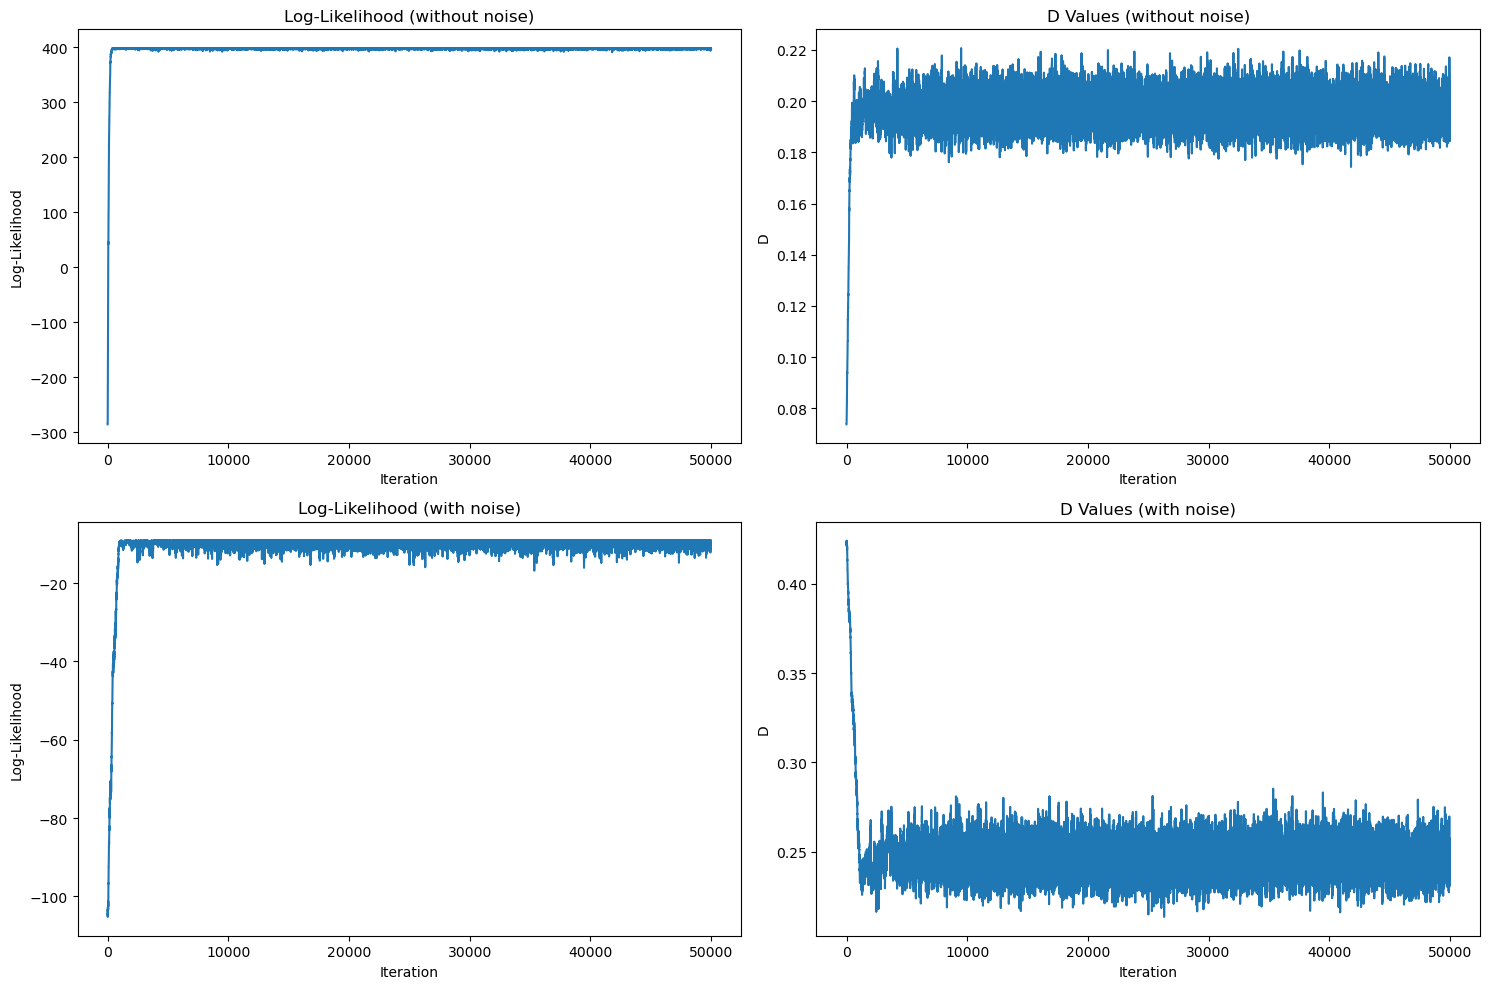

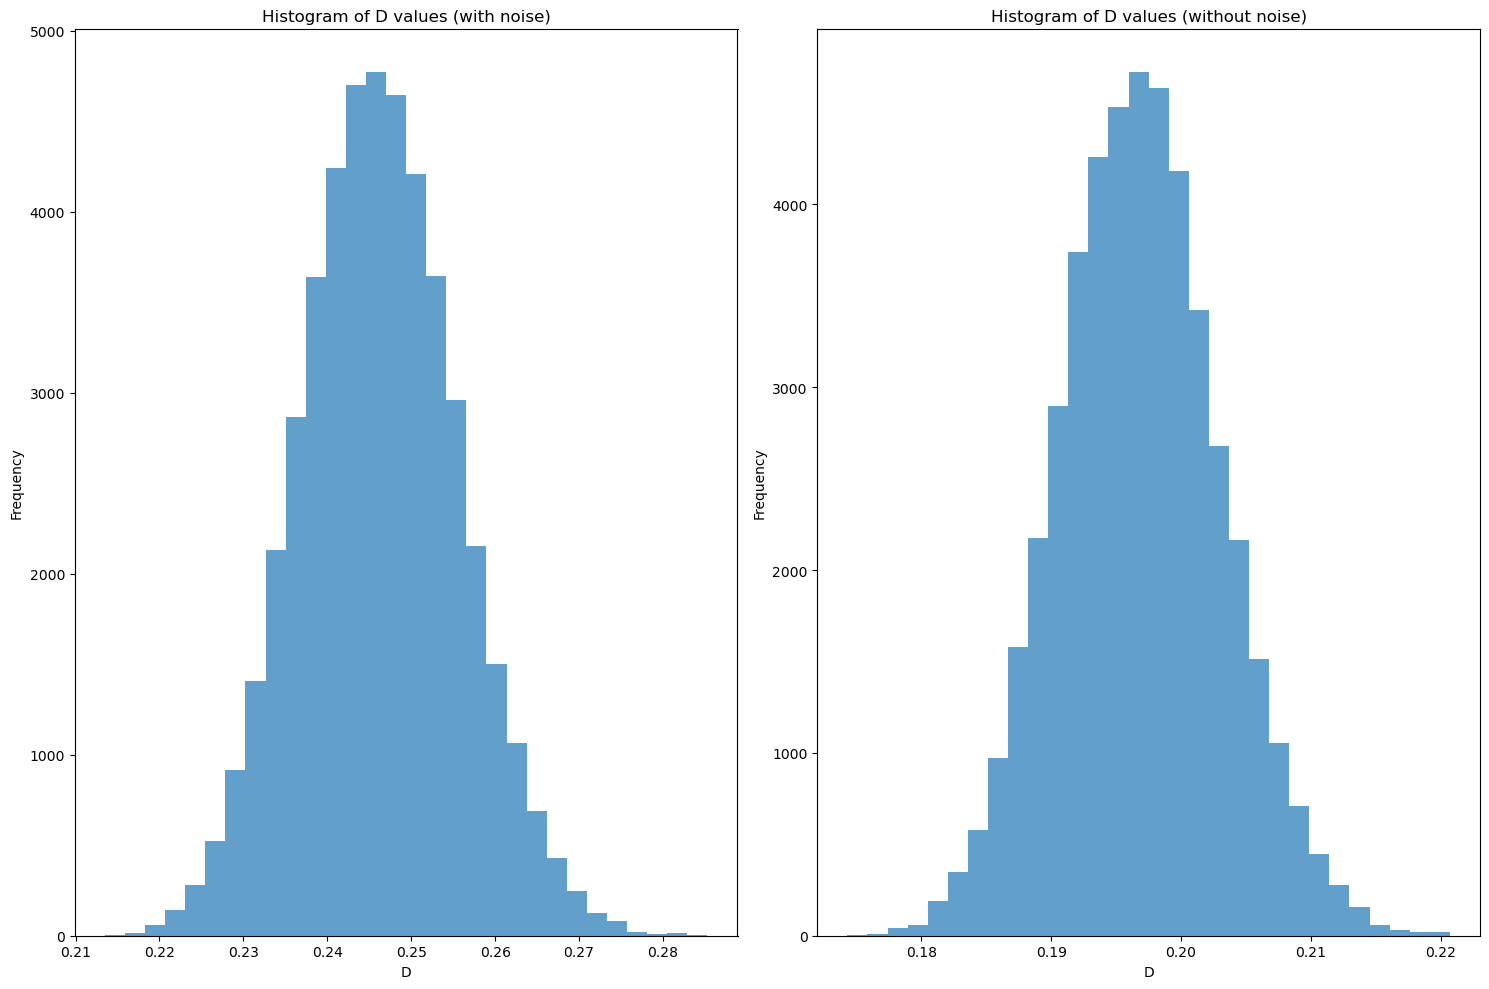

Estimated D with noise: 0.24620464429177397 ± 0.009348127406640077
Estimated D without noise: 0.19683163605960466 ± 0.006199619922577062
Real D: 0.19620464429177395 ± 0.009350942069637833
Number of sigmas apart noise: 4.942663089824203
Number of sigmas apart no noise: 0.5110577712767793


In [330]:
import numpy as np
from matplotlib import pyplot as plt
import tqdm

# Function to create data
def create_data(D, sigma):
    N = 1000  # Number of steps
    resX = np.zeros((2, N))  # Array to store the true data
    resU = np.zeros((2, N))  # Array to store the noisy data
    x0, y0 = 0, 0  # Initial positions in x and y
    dt = 0.1  # Time step
    print(np.sqrt(2 * D * dt))  # prints the value of the standard deviation of the noise

    for i in range(N):
        x, y = np.random.normal(0, 1, 2) * np.sqrt(2 * D * dt)  # 2D random walk
        x0 += x  # Update the position in x
        y0 += y  # Update the position in y
        resX[:, i] = [x0, y0]  # Store the true position
        resU[:, i] = [x0, y0] + np.random.normal(0, sigma, 2)  # Store the noisy position

    return resX, resU

# Simulation parameters
resX, resU = create_data(0.2, 0.1)  # Generate data
dresX = np.diff(resX, axis=1)  # Difference between consecutive columns of true data
dresU = np.diff(resU, axis=1)  # Difference between consecutive columns of noisy data

# Metropolis-Hastings algorithm
def metropolis_hastings(llh_fn, dresU, K, Dmax, noise, sD, dt, burn_in):
    moveD = 1  # Movement step counter
    D = np.random.rand() * Dmax  # Initial value of D
    history = np.zeros((2, K))  # Array to store history of log-likelihood, D, and noise
    Li = llh_fn(dresU, D, noise, dt)  # Initial log-likelihood
   
    for k in tqdm.tqdm(range(K)):  # Progress bar for iterations
        D_proposal = np.random.normal(D, sD)  # Proposal for D
        if D_proposal < 0:
            history[0, k] = Li  # Store log-likelihood
            history[1, k] = D  # Store D
            continue  # Skip negative proposals

        Lprop = llh_fn(dresU, D_proposal, noise, dt)  # Log-likelihood of proposal
        rand = np.log(np.random.rand())  # Random value for acceptance criterion

        if Lprop > Li or rand < (Lprop - Li):  # Acceptance criterion
            D = D_proposal  # Accept proposal
            Li = Lprop  # Update log-likelihood
            moveD += 1  # Increment move counter

        history[0, k] = Li  # Store log-likelihood
        history[1, k] = D  # Store D
      
        # Adjust proposal width during burn-in
        if k < burn_in and k % 200 == 0:
            ARD = k / moveD  # Acceptance rate
            if ARD > 0.3: 
                sD *= 1.05  # Increase proposal width
            elif ARD < 0.2:
                sD *= 0.95  # Decrease proposal width

    print("Acceptance rate:", moveD / K)
    print("Final value of D:", D)

    return history, moveD

def llh_fn_no_noise(dX, D, noise, dt):  # Log-likelihood function without noise
    N = len(dX[0])  # Number of steps
    fsum = N * np.sum(-np.log(2 * np.pi * (2 * D * dt))) - np.sum(dX**2) / (4 * D * dt)
    return fsum

def llh_fn_with_noise(dX, D, noise, dt):  # Log-likelihood function with noise
    N = len(dX[0])  # Number of steps
    fsum = N * np.sum(-np.log(2 * np.pi * (2 * D * dt + noise**2))) - np.sum(dX**2) / (2 * (2 * D * dt + noise**2))
    return fsum

# MCMC parameters
K = 50000  # Number of iterations
Dmax = 1  # Maximum value of D
noise = 0.1  # Noise level
sD = 0.001  # Proposal width
dt = 0.1  # Time step
burn_in = K // 5  # Number of burn-in iterations

# Running Metropolis-Hastings with and without noise
history_no_noise, moveD_no_noise = metropolis_hastings(llh_fn_no_noise, dresX, K, Dmax, noise, sD, dt, burn_in)
history_with_noise, moveD_with_noise = metropolis_hastings(llh_fn_with_noise, dresU, K, Dmax, noise, sD, dt, burn_in)

# Plot results
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Without noise
ax[0, 0].plot(history_no_noise[0, :K])
ax[0, 0].set_title("Log-Likelihood (without noise)")
ax[0, 0].set_xlabel("Iteration")
ax[0, 0].set_ylabel("Log-Likelihood")

ax[0, 1].plot(history_no_noise[1, :K])
ax[0, 1].set_title("D Values (without noise)")
ax[0, 1].set_xlabel("Iteration")
ax[0, 1].set_ylabel("D")


# With noise
ax[1, 0].plot(history_with_noise[0, :K])
ax[1, 0].set_title("Log-Likelihood (with noise)")
ax[1, 0].set_xlabel("Iteration")
ax[1, 0].set_ylabel("Log-Likelihood")

ax[1, 1].plot(history_with_noise[1, :K])
ax[1, 1].set_title("D Values (with noise)")
ax[1, 1].set_xlabel("Iteration")
ax[1, 1].set_ylabel("D")


plt.tight_layout()
plt.show()

# Plot histograms of D values
fig, ax = plt.subplots(1, 2 , figsize=(15, 10))

# With noise
ax[0].hist(history_with_noise[1, int(K*0.05):K], bins=30, alpha=0.7, label='With Noise')
ax[0].set_title("Histogram of D values (with noise)")
ax[0].set_xlabel("D")
ax[0].set_ylabel("Frequency")

# Without noise
ax[1].hist(history_no_noise[1, int(K*0.05):K], bins=30, alpha=0.7, label='Without Noise')
ax[1].set_title("Histogram of D values (without noise)")
ax[1].set_xlabel("D")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Calculate weighted mean and standard deviation for D
D_with_noise = history_with_noise[1, int(K*0.05):K]
D_without_noise = history_no_noise[1, int(K*0.05):K]

mean_D_with_noise = sum(D_with_noise) / len(D_with_noise)
variance_D_with_noise = sum((D_with_noise - mean_D_with_noise)**2) / (len(D_with_noise)-1)
mean_std_D_with_noise = np.sqrt(variance_D_with_noise)

mean_D_without_noise = sum(D_without_noise) / len(D_without_noise)
mean_std_D_without_noise = np.sqrt(sum((D_without_noise - mean_D_without_noise)**2) / (len(D_without_noise)-1))
variance_D_without_noise = sum((D_without_noise - mean_D_without_noise)**2) / (len(D_without_noise)-1)
mean_std_D_without_noise = np.sqrt(variance_D_without_noise)

real_D = mean_D_with_noise - noise**2 / (2 * dt)
variance_real_D = variance_D_with_noise + (noise**4 / (4 * dt**2)) / len(D_with_noise)
real_std_D = np.sqrt(variance_real_D)

print(f"Estimated D with noise: {mean_D_with_noise} ± {mean_std_D_with_noise}")
print(f"Estimated D without noise: {mean_D_without_noise} ± {mean_std_D_without_noise}")
print(f"Real D: {real_D} ± {real_std_D}")

# Calculate number of sigmas away from the real D
num_sigmas_apart_noise = abs(mean_D_with_noise - 0.2) / mean_std_D_with_noise
num_sigmas_apart_no_noise = abs(mean_D_without_noise - 0.2) / mean_std_D_without_noise

print(f"Number of sigmas apart noise: {num_sigmas_apart_noise}")
print(f"Number of sigmas apart no noise: {num_sigmas_apart_no_noise}")


## Results visualized

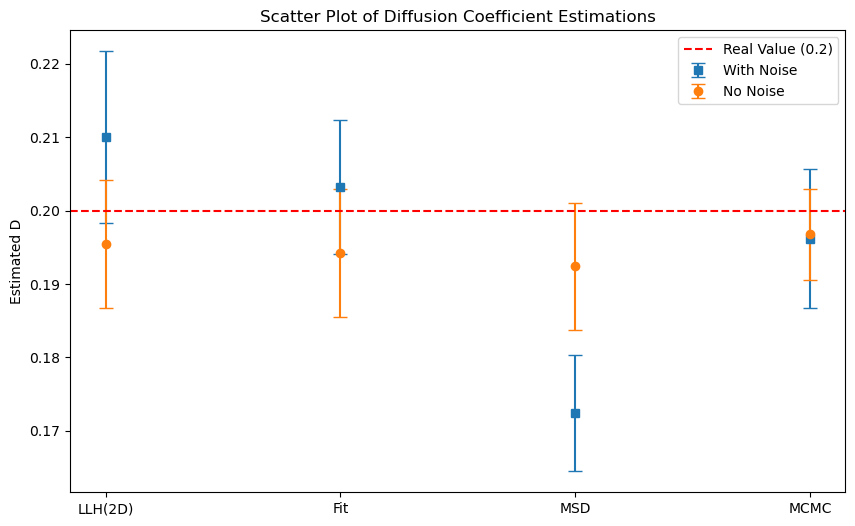

In [331]:
import matplotlib.pyplot as plt

# Example data
methods = ['LLH(2D)', 'Fit', 'MSD', 'MCMC']
real_value = 0.2
D_values_no_noise = [0.1955, 0.1942, 0.1924, 0.1968]
sigma_D_no_noise = [0.0087, 0.0087, 0.0086, 0.0062]
D_values_with_noise = [0.2100, 0.2032, 0.1724, 0.1962]
sigma_D_with_noise = [0.0117, 0.0091, 0.0079, 0.0094]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.errorbar(methods, D_values_with_noise, yerr=sigma_D_with_noise, fmt='s', label='With Noise', capsize=5)
plt.errorbar(methods, D_values_no_noise, yerr=sigma_D_no_noise, fmt='o', label='No Noise', capsize=5)
plt.axhline(y=real_value, color='red', linestyle='--', label='Real Value (0.2)')

# Add labels and title
plt.ylabel('Estimated D')
plt.title('Scatter Plot of Diffusion Coefficient Estimations')
plt.legend()
plt.show()
